# Análise de dados da Netflix.

Todos os tópicos a serem resolvidos foram criados pelo autor, afim de extratir o máximo de informações relevantes.

**Questões que serão extraídas:**
* Entre filmes e séries, qual é mais produzido na Netflix.
* Comparação entre os 5 maiores países produtores
* Relacione o título da obra, ano de lançamento e quando foi adicionada a Netflix
* Filtrar por categoria
* Comparação de qual ano lançou mais filmes
* Comparação de qual ano lançou mais séries

In [1]:
#Importando a bibliotecas necessárias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Atribuindo o arquivo para uma variável
df_netflix_original = pd.read_csv('netflix_titles.csv')

### Primeiros passos a serem feitos:
* Analisar a estrutura do nosso dataframe.
* Atribuir um cópia do arquivo original
* Remover possíveis colunas duplicadas.

#### Observando os primeiros valores do nosso dataframe
* É feita esta observação para que seja possível entender um pouco mais do nosso dataframe

In [10]:
#Imprimindo as 5 primeiras linhas, buscando entender como o arquivo está estruturado, observando suas colunas.
df_netflix_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Verificando os valores nulos.
* Realizando uma análise no dataframe para identificar a quantidade de valores nulos por colunas.

In [11]:
#Analisando a quantidade de valores nulos em nosso dataframe
df_netflix_original.isna().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

#### Criando uma cópia do arquivo original
* Por meio dessa cópia, podemos fazer qualquer alteração, que não vai alterar o arquivo original

In [2]:
#Atribuindo uma cópia para não afetar o arquivo original.
df_netflix = df_netflix_original.copy()

#### Excluindo as colunas que não serão utilizadas
* Nas questões propostas, as colunas selecionadas não são utilizadas, por motivo, optei por excluir.

In [84]:
#Após observar o DataFrame, vamos excluir as colunas que não vamos utilizar
df_netflix = df_netflix.drop(["description","director"],axis = 1)
display(df_netflix)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


### Segundo passo a ser feito:
* Analisar o DataFrame e extrair as questões propostas.

* **Entre filmes e séries, qual é mais assistido na Netflix.**

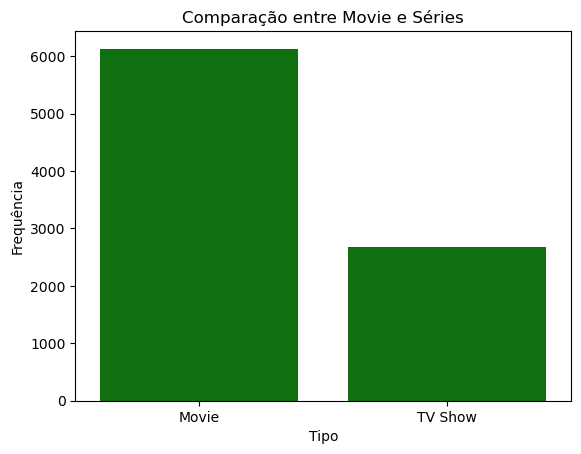

In [23]:
# Um gráfico de barras para representar a diferenças entre filmes e séries no decorrer dos anos
fig = sns.countplot(x=df_netflix['type'], color='green')

#Trocando o nome do eixo x
plt.xlabel('Tipo')
#Trocando o nome do eixo y
plt.ylabel('Frequência')

#Alterando o título
plt.title('Comparação entre Movie e Séries')

#Exibindo o resultado
plt.show(fig)

* **Comparação entre os 5 maiores países produtores.**

In [5]:
#Por meio desse comando, observamos os 5 maiores produtores
contagem = df_netflix['country'].value_counts().head(5)

#Exibindo o resultado
print(contagem)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64


Text(0.5, 1.0, 'Maiores produtores de filmes/séries da Netflix')

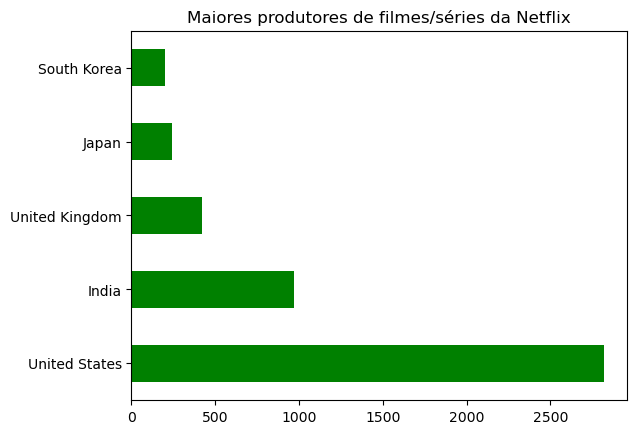

In [6]:
#Formulando um gráfico para os 5 primeiros países.
df_netflix['country'].value_counts().head(5).plot(kind='barh',color='green')

#Alterando o título
plt.title('Maiores produtores de filmes/séries da Netflix')

* **Relacione o diretor com o título da obra, ano de lançamento e quando foi adicionada a Netflix**
* Neste exemplo, fiz alteração do nome das colunas para ficar mais intuitivo

In [5]:
#Relacionando as colunas solicitadas, mostrando apenas os 10 primeiros dados.
df_netflix.loc[0:10, ['title', 'date_added', 'release_year']].rename(columns={'title':'Título','date_added':'Adicionado a netflix','release_year':'Ano de Lançamento'})

,Título,Adicionado a netflix,Ano de Lançamento
0,Dick Johnson Is Dead,"September 25, 2021",2020
1,Blood & Water,"September 24, 2021",2021
2,Ganglands,"September 24, 2021",2021
3,Jailbirds New Orleans,"September 24, 2021",2021
4,Kota Factory,"September 24, 2021",2021
5,Midnight Mass,"September 24, 2021",2021
6,My Little Pony: A New Generation,"September 24, 2021",2021
7,Sankofa,"September 24, 2021",1993
8,The Great British Baking Show,"September 24, 2021",2021
9,The Starling,"September 24, 2021",2021


* **Quais categorias foram mais produzidas no ano de 2021**

Text(0.5, 1.0, 'Categorias mais produzidas em 2021')

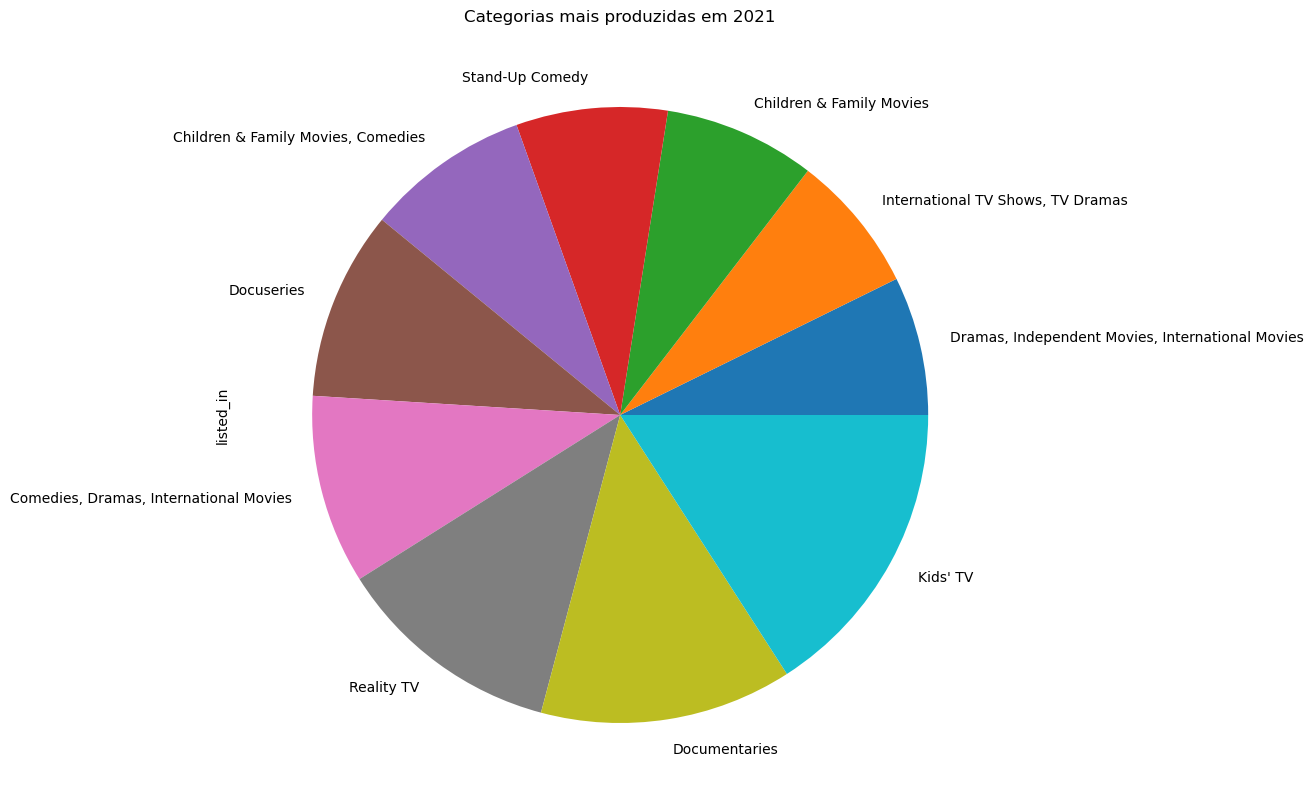

In [102]:
#Esse linha de comando, coleta as 10 categorias mais produzidas no ano de 2021
categorias_mais_produzidas_2021 = df_netflix[df_netflix['release_year'] == 2021]['listed_in'].value_counts().head(10).sort_values()

#Uma representação diferente em formato de gráfico de pizza
categorias_mais_produzidas_2021.plot(figsize=(10,10),kind="pie")

#Título do gráfico de Pizza
plt.title('Categorias mais produzidas em 2021')

### Para o mesmo exemplo foi criado mais um gráfico

Text(0.5, 1.0, 'Categorias mais produzidas em 2021 - Gráfico de barras')

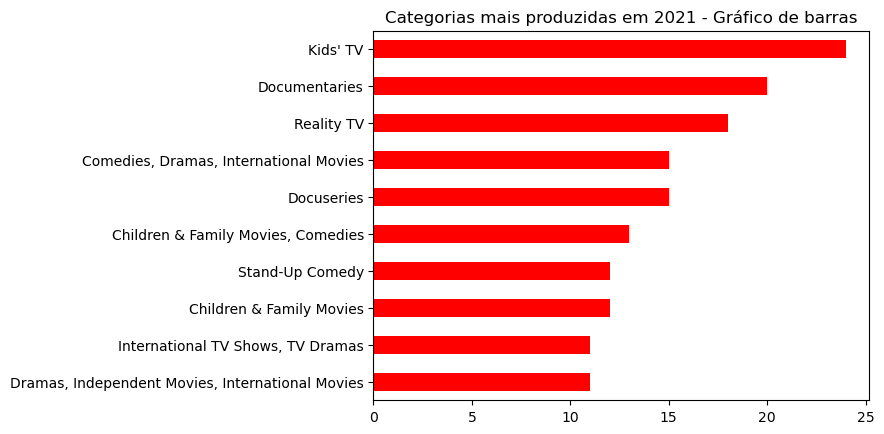

In [103]:
#Esse linha de comando, coleta as 10 categorias mais produzidas no ano de 2021
categorias_mais_produzidas_2021 = df_netflix[df_netflix['release_year'] == 2021]['listed_in'].value_counts().head(10).sort_values()

#Escolhendo o gráfico e sua cor
categorias_mais_produzidas_2021.plot(kind="barh",color='red')

#Título do Gráfico de barras
plt.title('Categorias mais produzidas em 2021 - Gráfico de barras')

#### Importante para observação.
* O gráfico vermelho representa quais categorias foram mais produzidas no ano de 2021.

Text(0.5, 1.0, 'Categorias mais produzidas - Gráfico de barras')

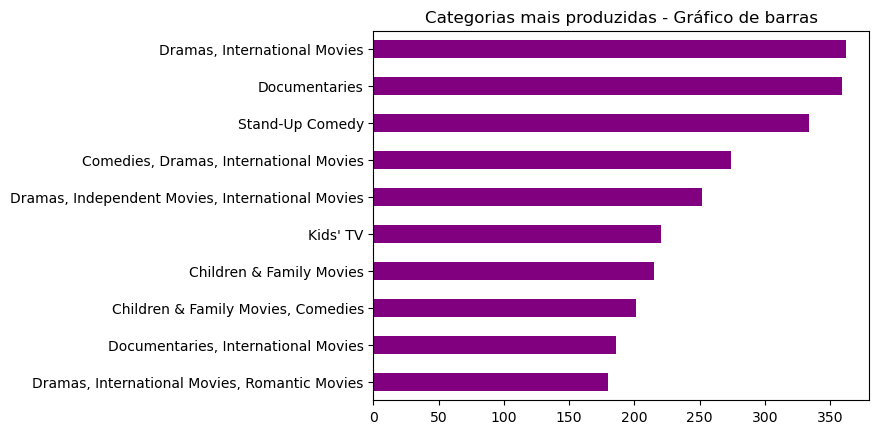

In [104]:
#Esse linha de comando, coleta as 10 categorias mais produzidas na base de dados
df_netflix['listed_in'].value_counts().head(10).sort_values().plot(kind="barh",color='purple')

#Título do Gráfico de barras
plt.title('Categorias mais produzidas - Gráfico de barras')

* Já este segundo gráfico, representa todos os anos da base de dados.

* **Comparação dos últimos 10 anos lançou mais filmes**

Text(0.5, 1.0, 'Comparação dos Últimos 10 Anos')

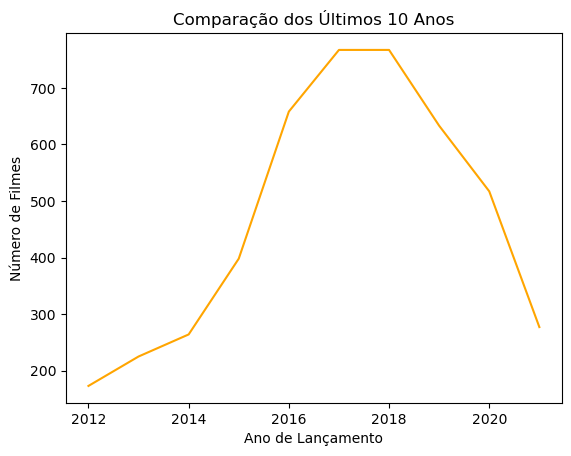

In [105]:
#Linha de comando que filtra os dados dos últimos 10 anos e que sejam filmes.
comparacao_ultimos_dez_anos = df_netflix[(df_netflix['type'] == 'Movie') & (df_netflix['release_year'] >= 2012)]['release_year'].value_counts().sort_index()

#Personalizando o gráfico
comparacao_ultimos_dez_anos.plot(color="orange")

#Personalizando o eixo X
plt.xlabel('Ano de Lançamento')

#Personalizando o eixo Y
plt.ylabel('Número de Filmes')

#Título do gráfico
plt.title('Comparação dos Últimos 10 Anos')

Text(0.5, 1.0, 'Comparação dos Últimos 10 Anos')

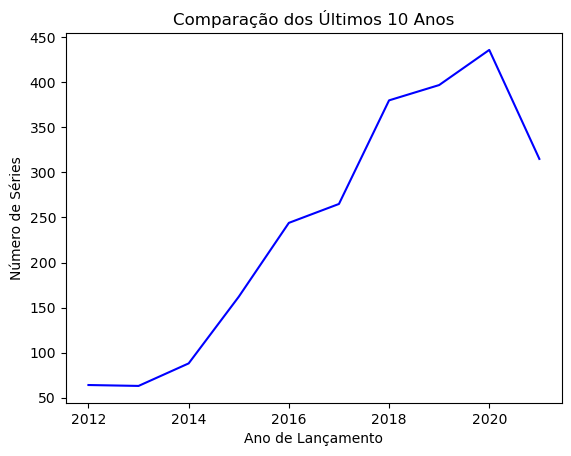

In [108]:
#Linha de comando que filtra os dados dos últimos 10 anos e que sejam filmes.
comparacao_ultimos_dez_anos = df_netflix[(df_netflix['type'] == 'TV Show') & (df_netflix['release_year'] >= 2012)]['release_year'].value_counts().sort_index()

#Personalizando o gráfico
comparacao_ultimos_dez_anos.plot(color="blue")

#Personalizando o eixo X
plt.xlabel('Ano de Lançamento')

#Personalizando o eixo Y
plt.ylabel('Número de Séries')

#Título do gráfico
plt.title('Comparação dos Últimos 10 Anos')